## Notebook Summary
---
This contents of this notebook includes initial EDA

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
#read in dataset
recid_df = pd.read_csv('data/NIJ_s_Recidivism_Challenge_Full_Dataset.csv')

In [3]:
recid_df.head(2)

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.0,0.0,0.488562,0.44761,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.0,0.0,0.425234,2.00000,False,True,False,False,True,1


In [4]:
recid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 25835 non-null  int64  
 1   Gender                                             25835 non-null  object 
 2   Race                                               25835 non-null  object 
 3   Age_at_Release                                     25835 non-null  object 
 4   Residence_PUMA                                     25835 non-null  int64  
 5   Gang_Affiliated                                    22668 non-null  object 
 6   Supervision_Risk_Score_First                       25360 non-null  float64
 7   Supervision_Level_First                            24115 non-null  object 
 8   Education_Level                                    25835 non-null  object 
 9   Depend

In [5]:
df_cat = recid_df.select_dtypes(include = 'object').copy()
df_numeric = recid_df.select_dtypes(include = ['float64','int64']).copy()
df_bool = recid_df.select_dtypes(include = 'bool').copy()

In [36]:
df_cat.head(2)

,Gender,Race,Age_at_Release,Gang_Affiliated,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes
0,M,BLACK,43-47,False,Standard,At least some college,3 or more,Drug,More than 3 years,6,6 or more,1,3,3,4,3 or more,3,2,2 or more,0,6,0,2
1,M,BLACK,33-37,False,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,6 or more,3 or more,0,3,5 or more,3 or more,4 or more,0,2 or more,4 or more,0,0,2


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

uniq_vals_df = pd.DataFrame(columns = ['column', 'values'])

uniq_vals = pd.DataFrame()

for c in df_cat.columns:
    uniq_vals['column'] = [c]
    uniq_vals['values'] = [df_cat[c].unique()]
    uniq_vals_df = uniq_vals_df.append(uniq_vals)

uniq_vals_df

,column,values
0,Gender,"[M, F]"
0,Race,"[BLACK, WHITE]"
0,Age_at_Release,"[43-47, 33-37, 48 or older, 38-42, 18-22, 23-27, 28-32]"
0,Gang_Affiliated,"[False, nan, True]"
0,Supervision_Level_First,"[Standard, Specialized, High, nan]"
0,Education_Level,"[At least some college, Less than HS diploma, High School Diploma]"
0,Dependents,"[3 or more, 1, 0, 2]"
0,Prison_Offense,"[Drug, Violent/Non-Sex, Property, nan, Other, Violent/Sex]"
0,Prison_Years,"[More than 3 years, 1-2 years, Less than 1 year, Greater than 2 to 3 years]"
0,Prior_Arrest_Episodes_Felony,"[6, 7, 8, 4, 10 or more, 3, 9, 2, 5, 1, 0]"


In [9]:
df_numeric.head(2)

,ID,Residence_PUMA,Supervision_Risk_Score_First,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Training_Sample
0,1,16,3.0,612.000000,0.0,0.0,0.0,0.0,0.488562,0.44761,1
1,2,16,6.0,35.666667,0.0,0.0,0.0,0.0,0.425234,2.00000,1


In [10]:
# create separate df for recidivism within 3 years T or F
recid_true = recid_df[(recid_df['Recidivism_Within_3years'] == True)].copy()
recid_false = recid_df[(recid_df['Recidivism_Within_3years'] == False)].copy()

In [11]:
recid_true.head(2)

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,6 or more,3 or more,0,3,5 or more,1,0,3 or more,4 or more,1,0,2 or more,1,1,1,0,0,0,0,0,0,1,0,0,4 or more,0,0,2,35.666667,0.000000,0.0,0.000000,0.0,0.425234,2.0,0,1,0,0,1,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,Drug,1-2 years,6,6 or more,3 or more,2,2,5 or more,1,0,3 or more,2,1,1,2 or more,0,1,0,0,0,1,1,0,0,1,0,1,4 or more,6,0,0,93.666667,0.333333,0.0,0.166667,0.0,0.000000,0.0,0,1,0,1,0,1


### EDA

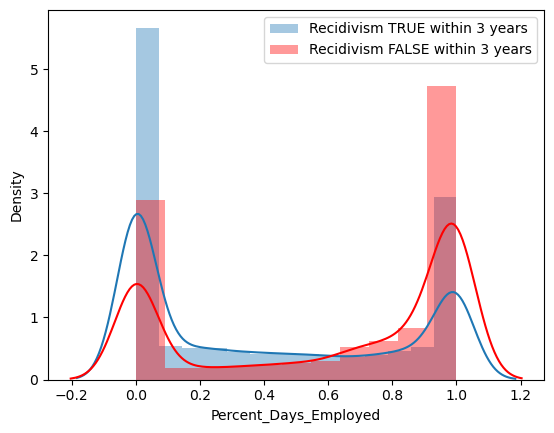

In [12]:
data1 = recid_true[recid_true['Employment_Exempt'] == False]
data2 = recid_false[recid_false['Employment_Exempt'] == False]


sns.distplot(data1['Percent_Days_Employed'], label='Recidivism TRUE within 3 years')
sns.distplot(data2['Percent_Days_Employed'], color='red', label='Recidivism FALSE within 3 years')
plt.legend();


# If an individual is not exempt from working during parole, if they are employed for 60% of the time, they are more likely to not be reincarcerated

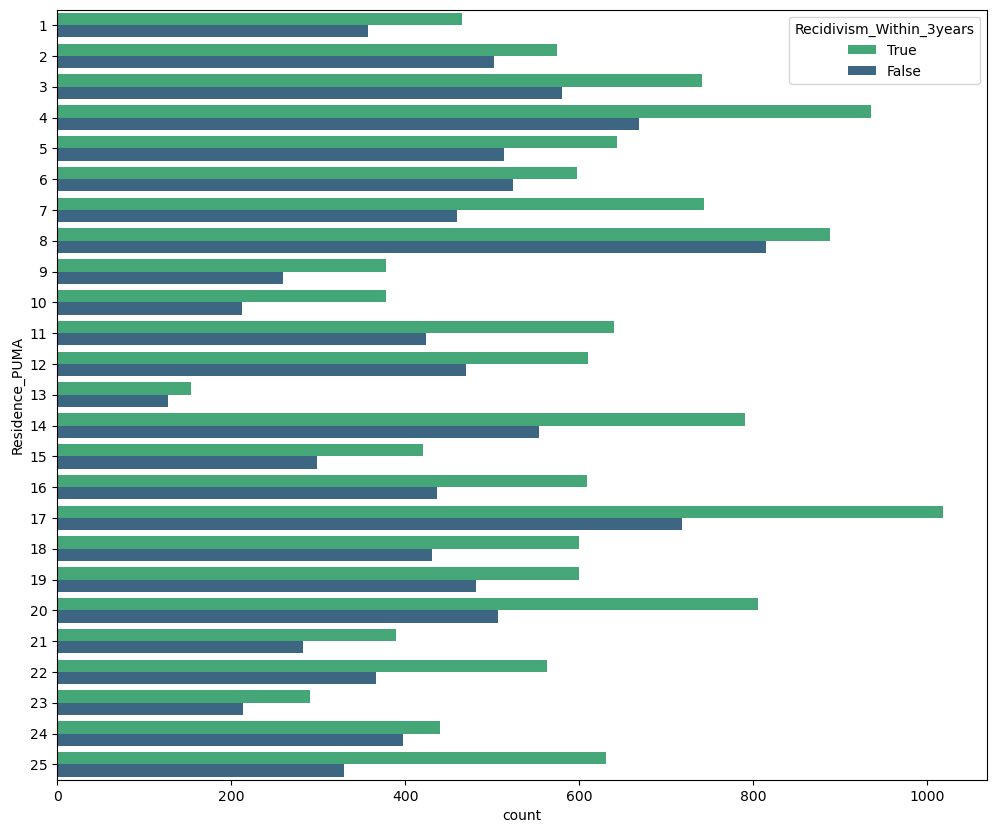

In [13]:
plt.figure(figsize = (12,10))
sns.countplot(data=recid_df,
              y='Residence_PUMA',
              hue='Recidivism_Within_3years',
              hue_order =[True, False],
              orient='h',
              palette='viridis_r');

#is there a way to order this by largest to smallest True val
# recid_df.groupby(['Residence_PUMA','Recidivism_Within_3years'])[['Recidivism_Within_3years']].count()

# there are pumas zone with smaller counts of individuals reoffending

## Gender

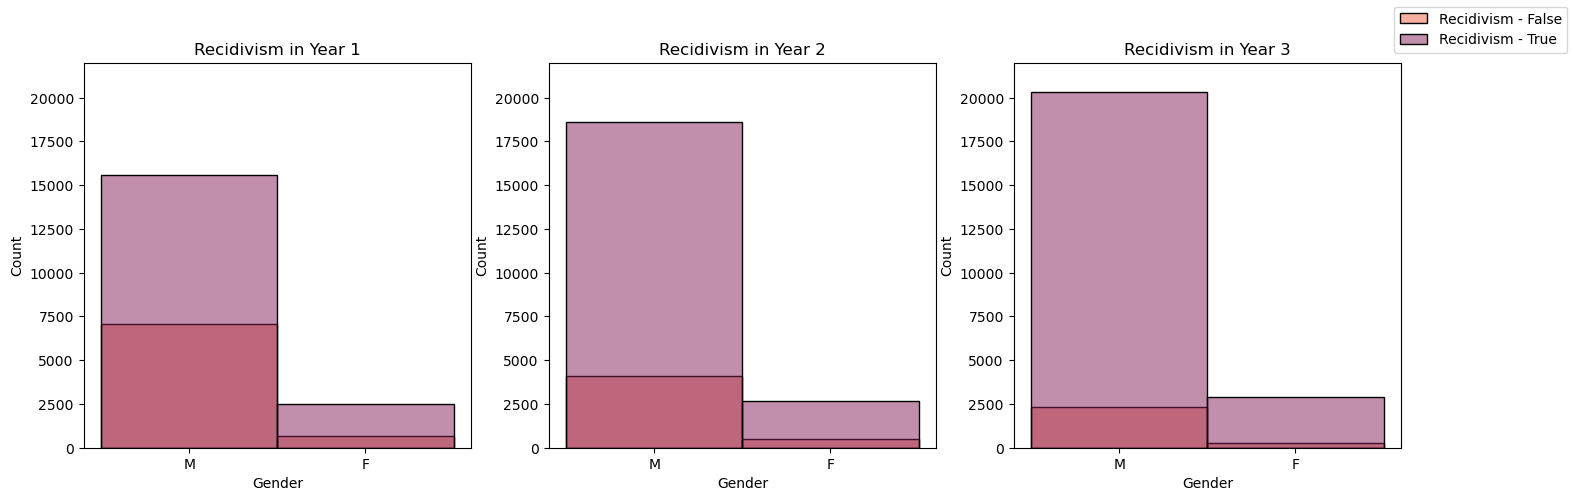

In [34]:
#create subplots
fig, ax = plt.subplots(1,3, figsize=(17,5))

ax1 = sns.histplot(data=recid_df, x = 'Gender', hue='Recidivism_Arrest_Year1', palette='rocket', ax=ax[0], legend = False)
ax2 = sns.histplot(data=recid_df, x = 'Gender', hue='Recidivism_Arrest_Year2', palette='rocket', ax=ax[1], legend = False)
ax3 = sns.histplot(data=recid_df, x = 'Gender', hue='Recidivism_Arrest_Year3', palette='rocket', ax=ax[2], legend = False)

ax1.title.set_text('Recidivism in Year 1')
ax2.title.set_text('Recidivism in Year 2')
ax3.title.set_text('Recidivism in Year 3')

ax1.set_ylim(0,22_000)
ax2.set_ylim(0,22_000)
ax3.set_ylim(0,22_000)

# Labels to use in the legend for each line
labels = ["Recidivism - False", "Recidivism - True"]

fig.legend([ax1, ax2, ax3], labels=labels,
           loc="upper right");

- recidivism among female individuals stay pretty constant year to year
- recidivism among male individuals increases year to to year

## Race

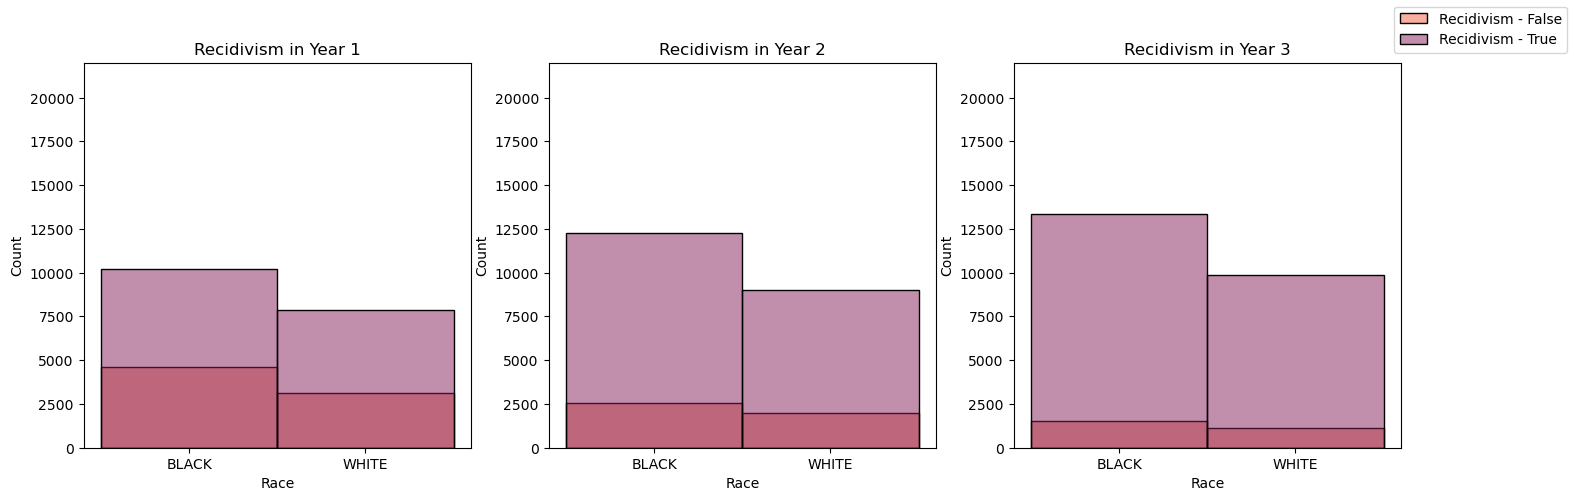

In [15]:
#create subplots
fig, ax = plt.subplots(1,3, figsize=(17,5))

ax1 = sns.histplot(data=recid_df, x = 'Race', hue='Recidivism_Arrest_Year1', palette='rocket', ax=ax[0], legend = False)
ax2 = sns.histplot(data=recid_df, x = 'Race', hue='Recidivism_Arrest_Year2', palette='rocket', ax=ax[1], legend = False)
ax3 = sns.histplot(data=recid_df, x = 'Race', hue='Recidivism_Arrest_Year3', palette='rocket', ax=ax[2], legend = False)

ax1.title.set_text('Recidivism in Year 1')
ax2.title.set_text('Recidivism in Year 2')
ax3.title.set_text('Recidivism in Year 3')

ax1.set_ylim(0,22_000)
ax2.set_ylim(0,22_000)
ax3.set_ylim(0,22_000)

# Labels to use in the legend for each line
labels = ["Recidivism - False", "Recidivism - True"]

fig.legend([ax1, ax2, ax3], labels=labels,
           loc="upper right");

#### Seems like race is less of a factor in recidivism YoY b/c the difference between Black and White re-offenders isn't a huge difference after year 1

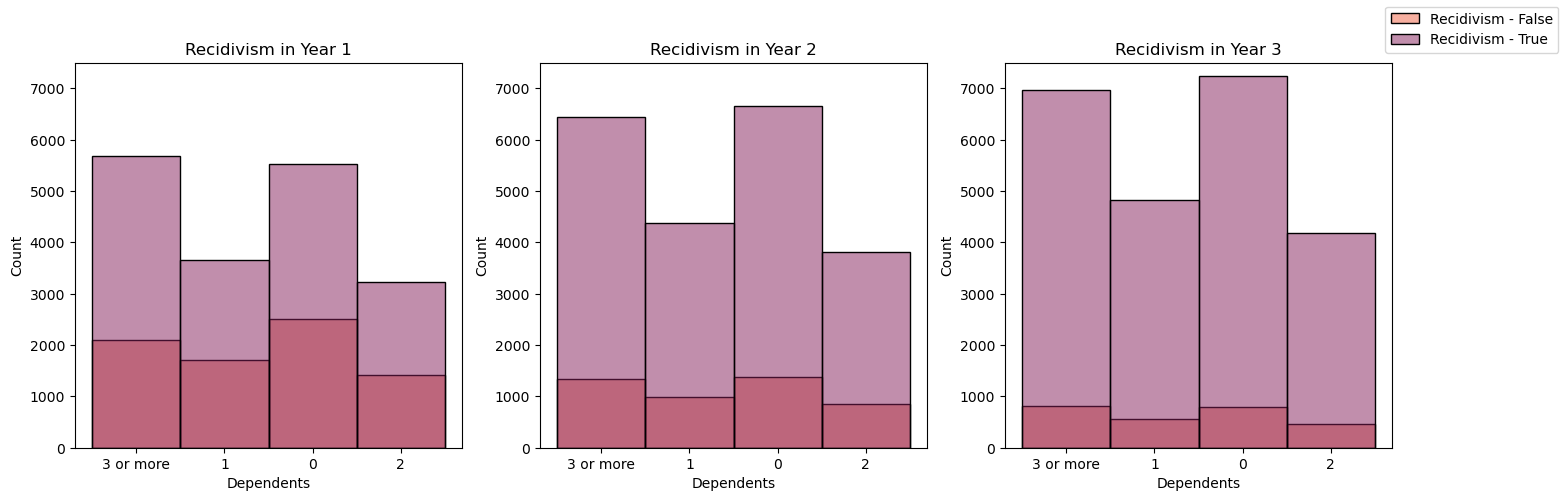

In [28]:
#create subplots
fig, ax = plt.subplots(1,3, figsize=(17,5))

ax1 = sns.histplot(data=recid_df, x = 'Dependents', hue='Recidivism_Arrest_Year1', palette='rocket', ax=ax[0], legend = False)
ax2 = sns.histplot(data=recid_df, x = 'Dependents', hue='Recidivism_Arrest_Year2', palette='rocket', ax=ax[1], legend = False)
ax3 = sns.histplot(data=recid_df, x = 'Dependents', hue='Recidivism_Arrest_Year3', palette='rocket', ax=ax[2], legend = False)

ax1.title.set_text('Recidivism in Year 1')
ax2.title.set_text('Recidivism in Year 2')
ax3.title.set_text('Recidivism in Year 3')

ax1.set_ylim(0,7500)
ax2.set_ylim(0,7500)
ax3.set_ylim(0,7500)

# Labels to use in the legend for each line
labels = ["Recidivism - False", "Recidivism - True"]

fig.legend([ax1, ax2, ax3], labels=labels,
           loc="upper right");

#### Interesting to see that recidivism is more prominent if the individual has 0 or 3 or more dependents. 

### Age at Release

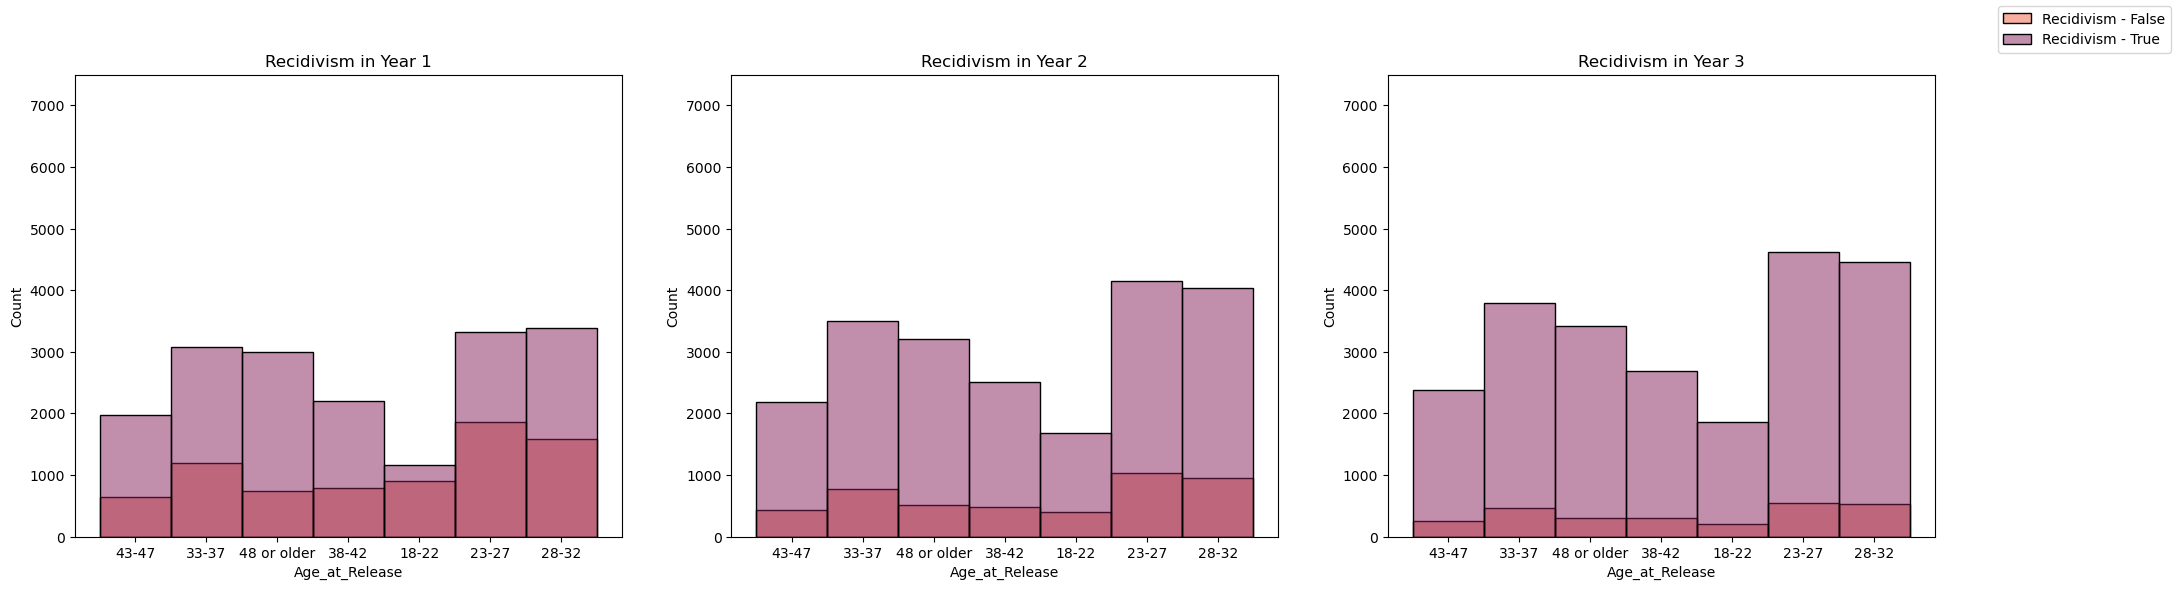

In [29]:
#create subplots
fig, ax = plt.subplots(1,3, figsize=(24,6))

ax1 = sns.histplot(data=recid_df, x = 'Age_at_Release', hue='Recidivism_Arrest_Year1', palette='rocket', ax=ax[0], legend = False)
ax2 = sns.histplot(data=recid_df, x = 'Age_at_Release', hue='Recidivism_Arrest_Year2', palette='rocket', ax=ax[1], legend = False)
ax3 = sns.histplot(data=recid_df, x = 'Age_at_Release', hue='Recidivism_Arrest_Year3', palette='rocket', ax=ax[2], legend = False)

ax1.title.set_text('Recidivism in Year 1')
ax2.title.set_text('Recidivism in Year 2')
ax3.title.set_text('Recidivism in Year 3')

ax1.set_ylim(0,7500)
ax2.set_ylim(0,7500)
ax3.set_ylim(0,7500)

# Labels to use in the legend for each line
labels = ["Recidivism - False", "Recidivism - True"]

fig.legend([ax1, ax2, ax3], labels=labels,
           loc="upper right");

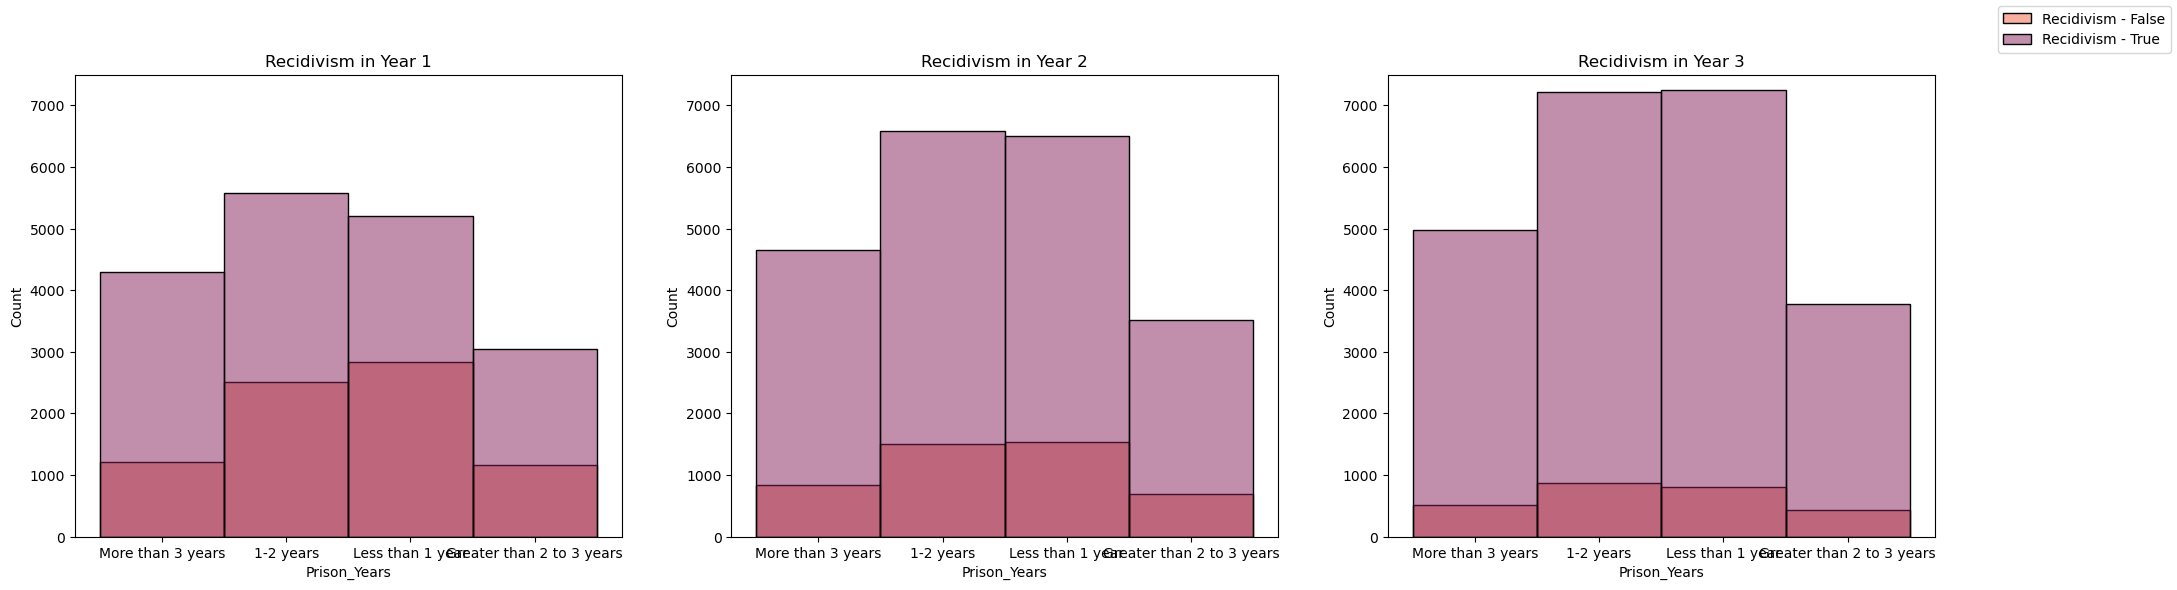

In [32]:
#create subplots
fig, ax = plt.subplots(1,3, figsize=(24,6))

ax1 = sns.histplot(data=recid_df, x = 'Prison_Years', hue='Recidivism_Arrest_Year1', palette='rocket', ax=ax[0], legend = False)
ax2 = sns.histplot(data=recid_df, x = 'Prison_Years', hue='Recidivism_Arrest_Year2', palette='rocket', ax=ax[1], legend = False)
ax3 = sns.histplot(data=recid_df, x = 'Prison_Years', hue='Recidivism_Arrest_Year3', palette='rocket', ax=ax[2], legend = False)

ax1.title.set_text('Recidivism in Year 1')
ax2.title.set_text('Recidivism in Year 2')
ax3.title.set_text('Recidivism in Year 3')

ax1.set_ylim(0,7500)
ax2.set_ylim(0,7500)
ax3.set_ylim(0,7500)

# Labels to use in the legend for each line
labels = ["Recidivism - False", "Recidivism - True"]

fig.legend([ax1, ax2, ax3], labels=labels,
           loc="upper right");

### Writing a Function to Plot Analysis of Categorical Columns

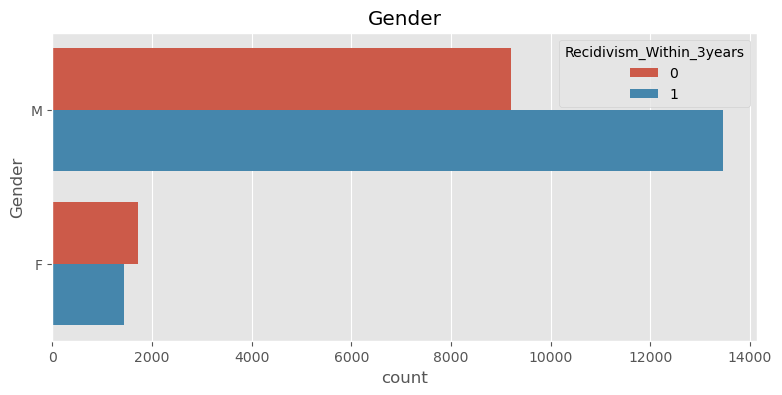

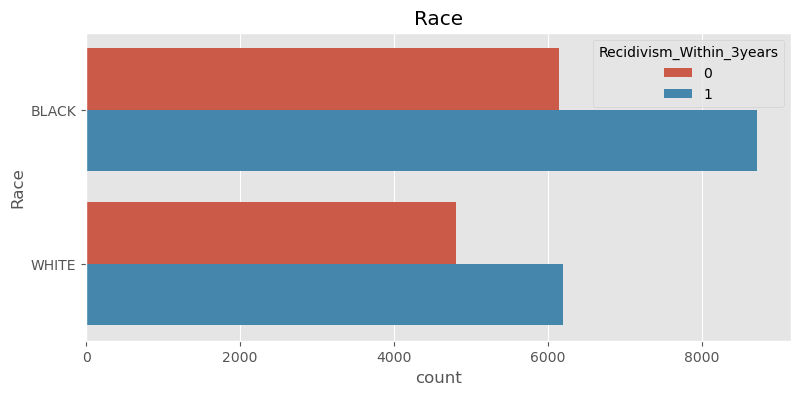

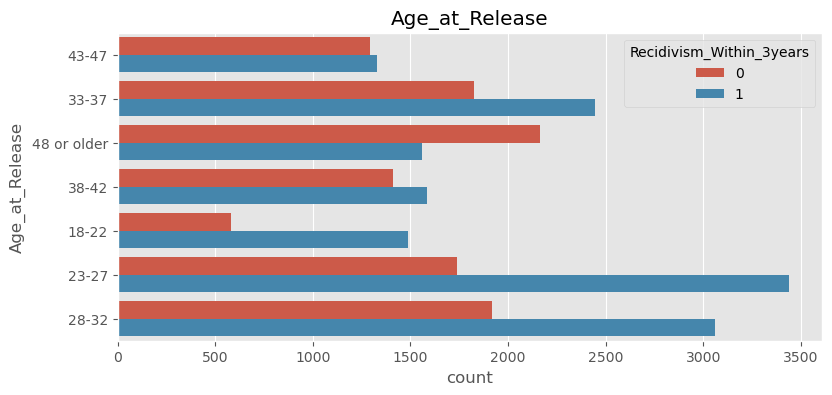

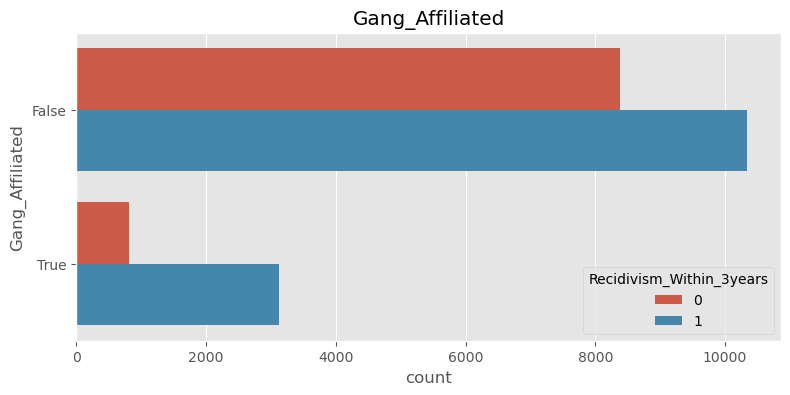

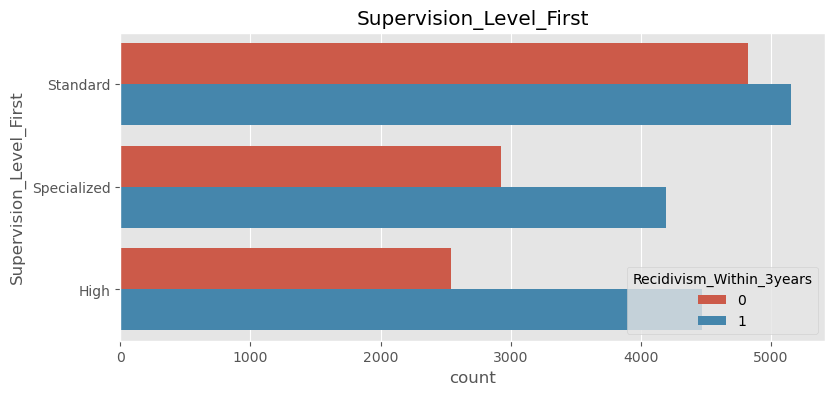

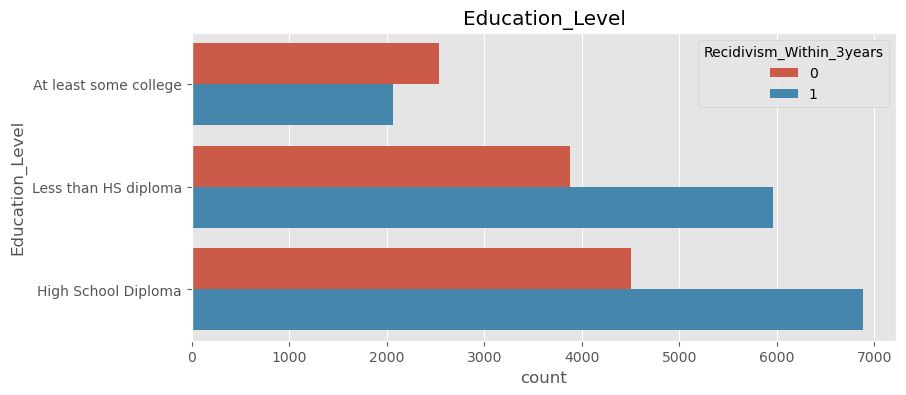

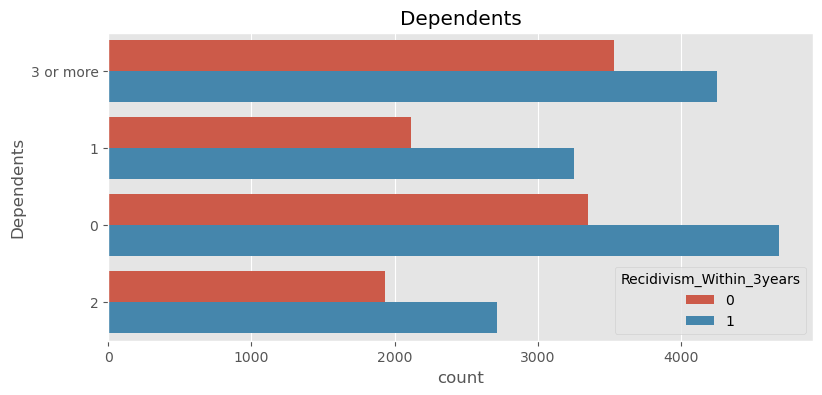

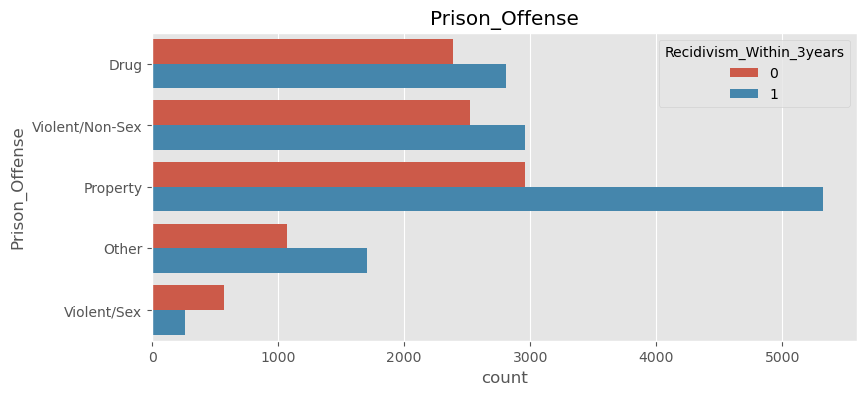

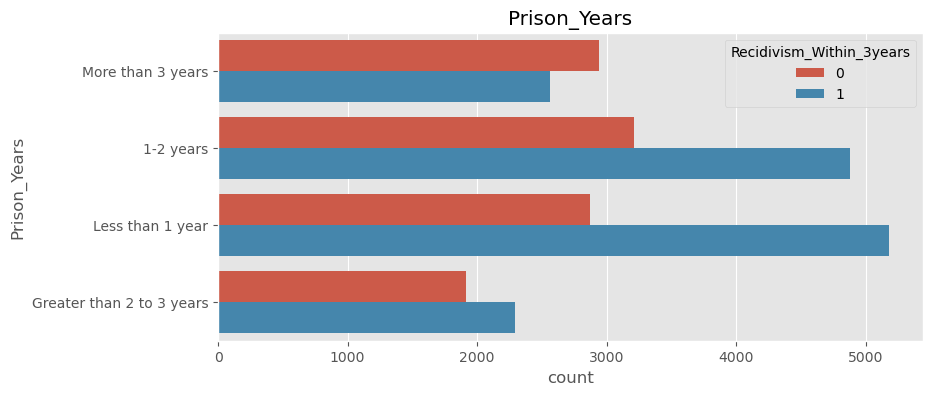

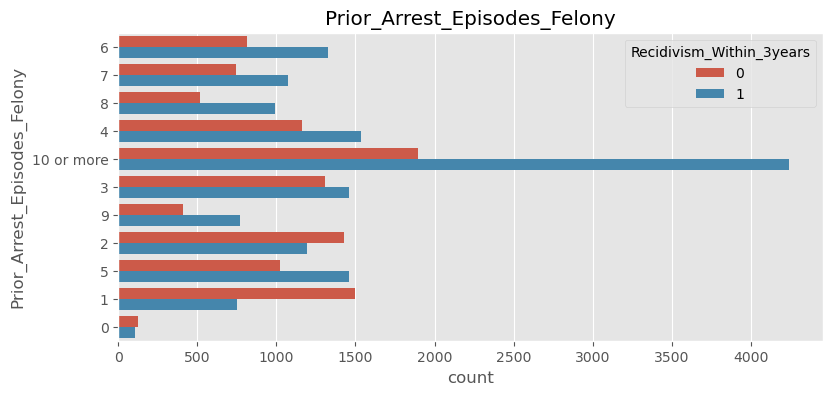

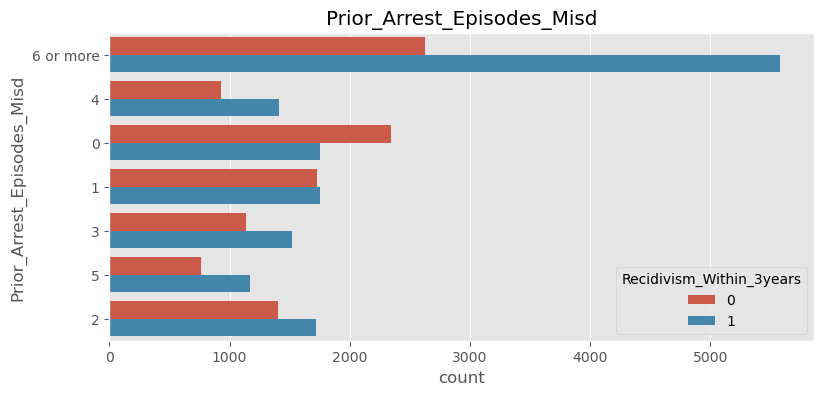

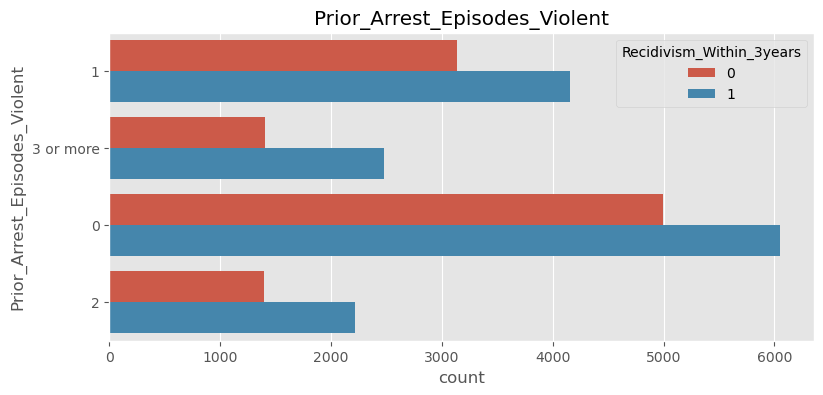

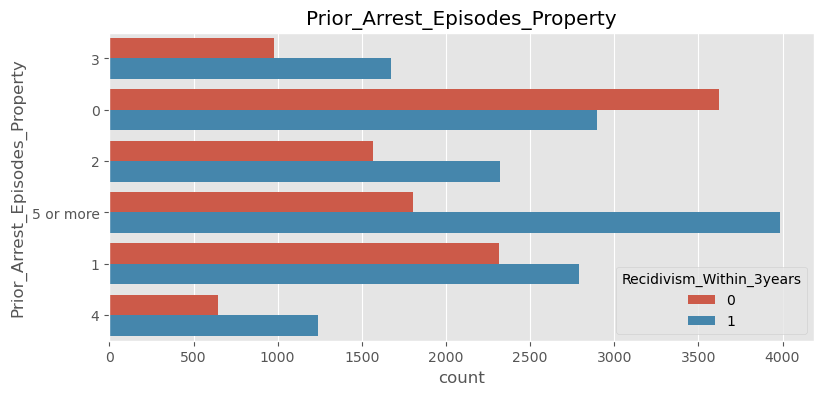

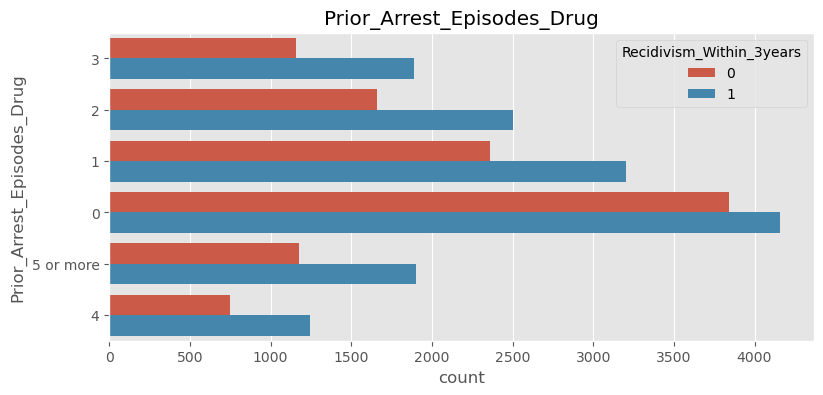

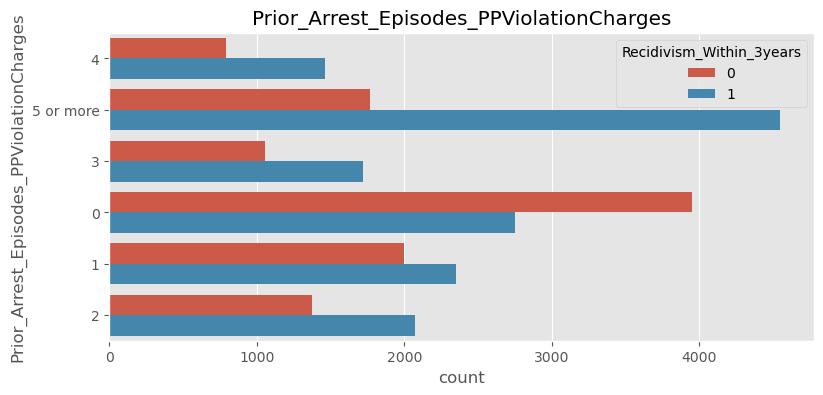

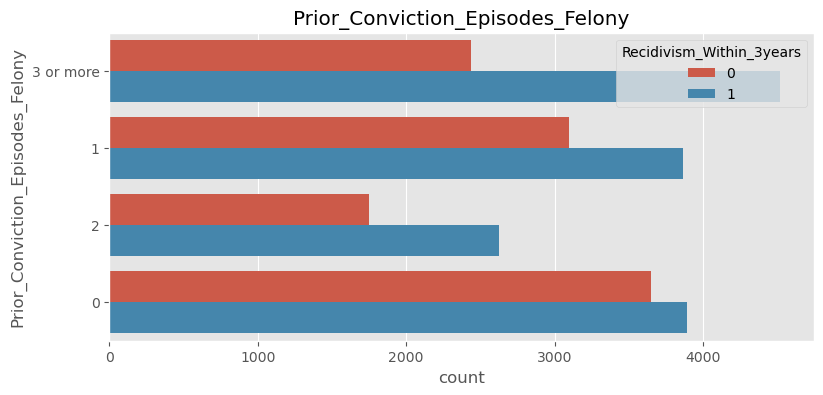

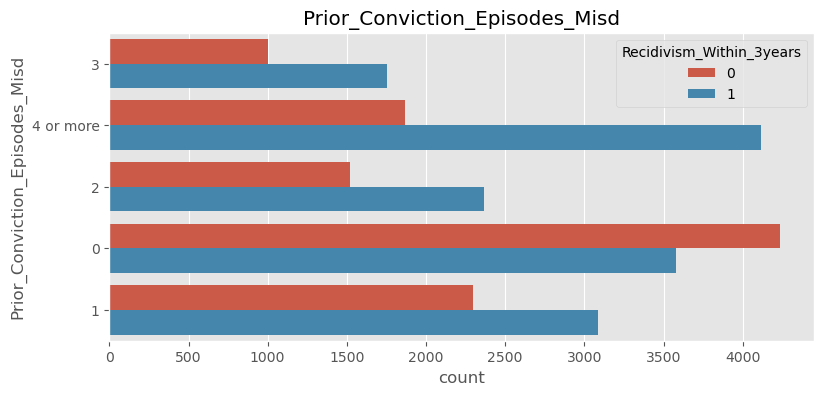

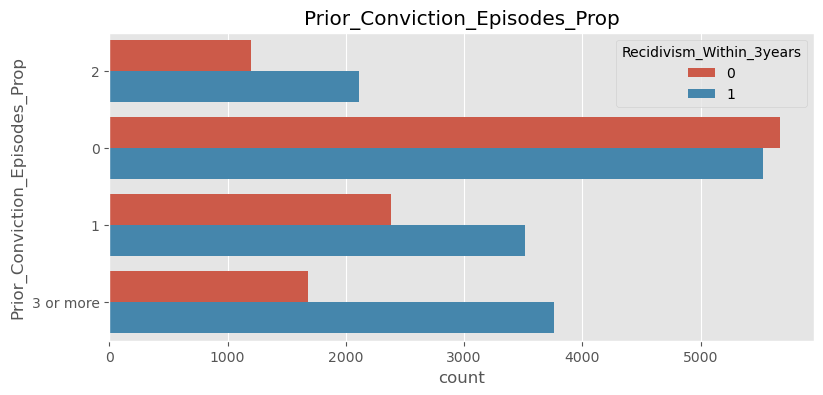

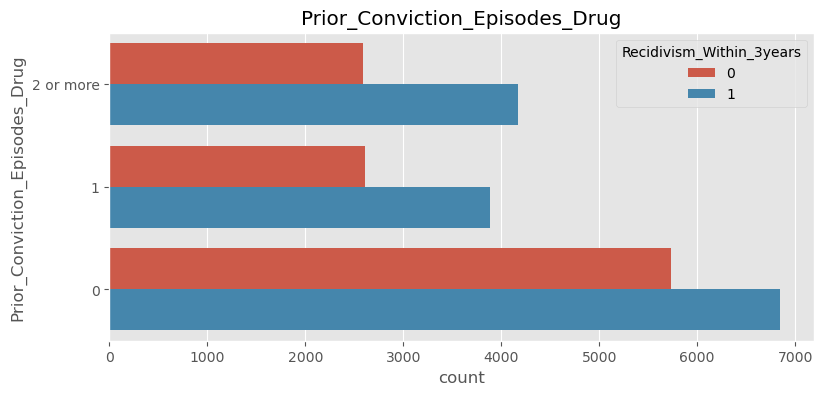

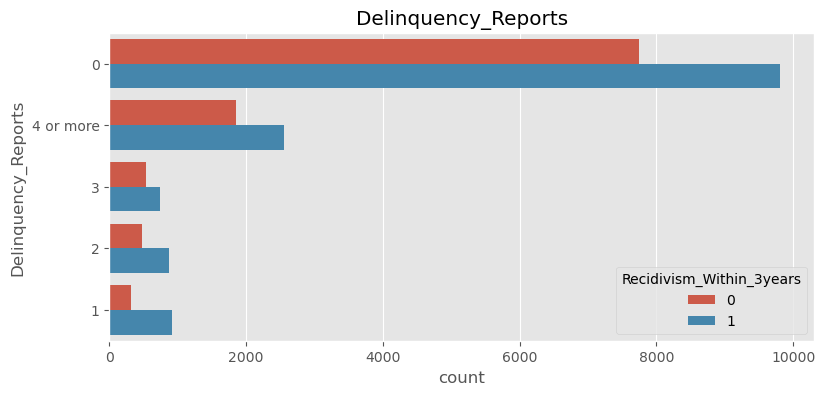

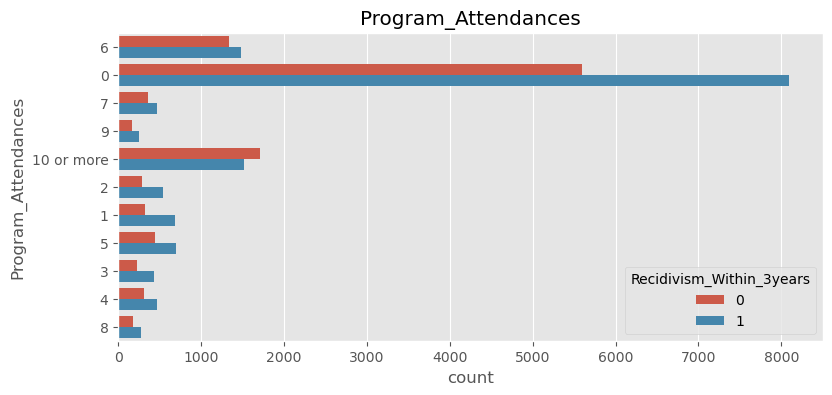

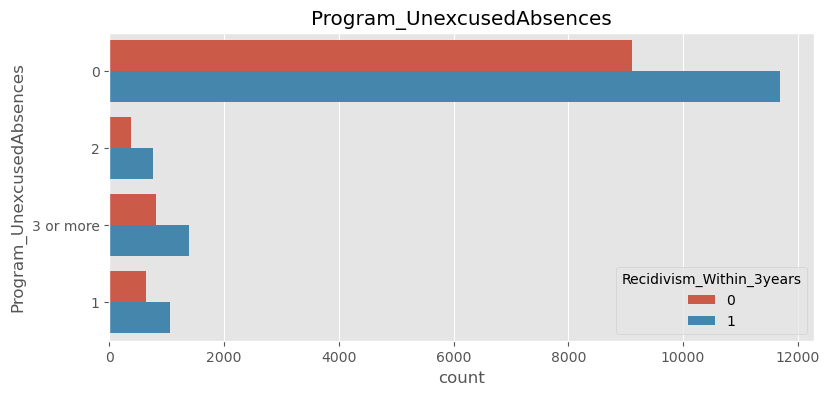

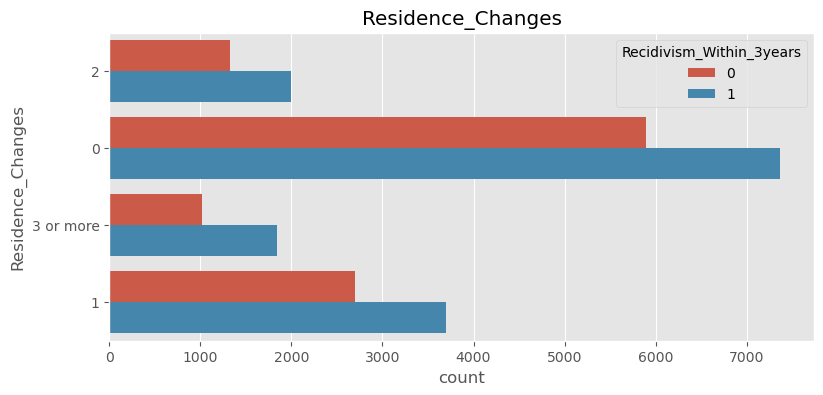

In [44]:
# reference - https://www.kaggle.com/code/rashmiranu/banking-dataset-eda-and-binary-classification

cols = df_cat.columns.values
plt.style.use("ggplot")

for c in cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(y=recid_df[c], hue=recid_df['Recidivism_Within_3years'], orient='h')
    plt.title(c)